In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
inputs = keras.Input(shape=(28,28))
flatten = keras.layers.Flatten()
dense1 = keras.layers.Dense(128,activation='relu')
dense2 = keras.layers.Dense(10)

In [ ]:
x = flatten(inputs)
x = dense1(x)
outputs = dense2(x)
 
model = tf.keras.Model(
    inputs=inputs,
    outputs=outputs,
    name='Functional API model'
    )
print(model.summary())

Model: "Functional API model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
# multiple outputs  modes 

#    i
#    |
#    b
#    |  
#    c
#   / \
#  o1 o2

In [ ]:
inputs = keras.Input(shape=(28,28))
flatten = keras.layers.Flatten()
dense1 = keras.layers.Dense(128,activation='relu')
dense2 = keras.layers.Dense(10)

dense2_2 = keras.layers.Dense(1)

In [ ]:
x = flatten(inputs)
x = dense1(x)

output_1 = dense2(x)
output_2 = dense2(x)


model = tf.keras.Model(
    inputs=inputs,
    outputs=[output_1,output_2],
    name='Functional API model'
    )


In [ ]:
model.summary()

Model: "Functional API model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 28, 28)]     0           []                               
                                                                                                  
 flatten_2 (Flatten)            (None, 784)          0           ['input_3[0][0]']                
                                                                                                  
 dense_2 (Dense)                (None, 128)          100480      ['flatten_2[0][0]']              
                                                                                                  
 dense_3 (Dense)                (None, 10)           1290        ['dense_2[0][0]',                
                                                                  'dense_2[0][0

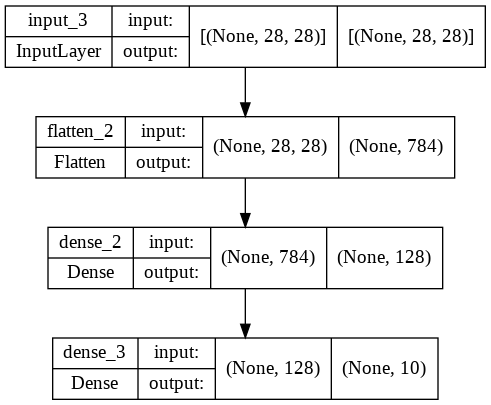

In [ ]:
keras.utils.plot_model(model, "multipleoutputmodel.png", show_shapes=True)

In [ ]:
# transfer learining

In [ ]:
base_model = keras.applications.VGG16()

x = base_model.layers[-2].output # accesing second last layers for the outputs
new_outputs = tf.keras.layers.Dense(1)(x)

new_model = keras.Model(
    inputs=base_model.inputs,
    outputs= new_outputs
)



In [ ]:
#  two output functional model

inputs = keras.Input(shape=(28,28))
flatten = keras.layers.Flatten()
dense1= keras.layers.Dense(128,activation='relu',name='midlle-dense-layer')

dense2= keras.layers.Dense(10,activation='softmax',name='category-output')
dense3= keras.layers.Dense(1,activation='sigmoid',name='binary-output')


In [ ]:
x= flatten(inputs)
x= dense1(x)

output1= dense2(x)
output2= dense3(x)

model = keras.Model(
    inputs=inputs,
    outputs=[output1,output2],
    name='minist model'
)

In [ ]:
model.summary()

Model: "minist model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 28, 28)]     0           []                               
                                                                                                  
 flatten_1 (Flatten)            (None, 784)          0           ['input_2[0][0]']                
                                                                                                  
 midlle-dense-layer (Dense)     (None, 128)          100480      ['flatten_1[0][0]']              
                                                                                                  
 category-output (Dense)        (None, 10)           1290        ['midlle-dense-layer[0][0]']     
                                                                                       

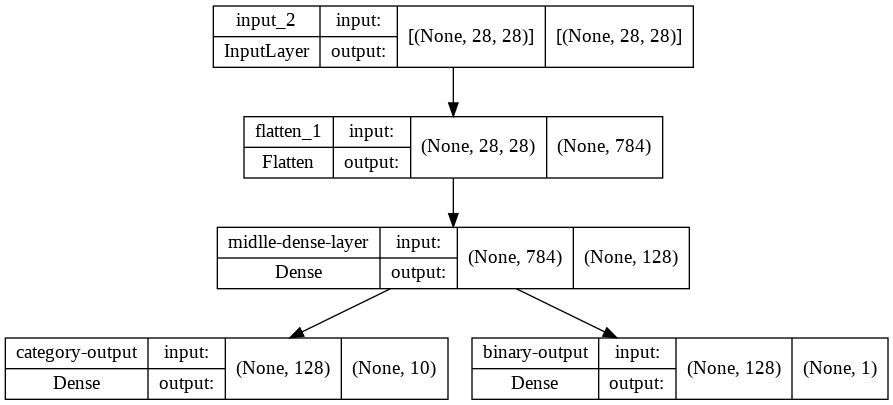

In [ ]:
keras.utils.plot_model(model, "multipleoutputmodel.png", show_shapes=True)

In [ ]:
from tensorflow.python import metrics
loss1 = keras.losses.SparseCategoricalCrossentropy(from_logits=False) # from_logits false cause of the lastlayer is already trained 
loss2 = keras.losses.BinaryCrossentropy(from_logits=False)

optim = keras.optimizers.Adam(learning_rate=0.001)
losses= {
    "category-output":loss1,
    "binary-output":loss2
}

metric=['accuracy']

model.compile(
    loss=losses,
    optimizer=optim,
    metrics=metric
)

In [ ]:
# example 

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [ ]:
x_train.shape,y_train.shape

((60000, 28, 28), (60000,))

In [ ]:
x_test.shape,y_test.shape

((10000, 28, 28), (10000,))

In [ ]:
x_train= x_train/255.0
x_test = x_test/255.0

In [ ]:
import numpy as np

In [ ]:
y_train_binary = np.zeros(y_train.shape,dtype=np.uint8)
for idx ,y in enumerate(y_train):
  if y > 5:
    y_train_binary[idx]=1

In [ ]:
y_train_binary[:20]

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1],
      dtype=uint8)

In [ ]:
y_train[:20]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9],
      dtype=uint8)

In [ ]:
y_train_binary.shape

(60000,)

In [ ]:
y_train.shape

(60000,)

In [ ]:
model.compile(
          optimizer=tf.keras.optimizers.Adam(learning_rate= 0.001 ),
          loss={
              'category-output':tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              'binary-output':tf.keras.losses.BinaryCrossentropy(from_logits=False)
          },
          )

In [ ]:
y= {
    "category-output":y_train,
    "binary-output":y_train_binary
}

In [ ]:
model.fit(
    x=x_train,
    y=y,
    epochs=10,
    verbose=1,
    batch_size=64
)

Epoch 1/10


ValueError: ignored